### Importing Libraries

In [1]:
import pandas as pd 
pd.set_option('display.max_rows',None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
data = pd.read_csv('headbrain.csv')
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


### Segregating variables: Independent and Dependent variables

In [3]:
x = data['Head Size(cm^3)']
y = data['Brain Weight(grams)']
n = len(y)
X=x
Y=y
x.shape , y.shape, n

((237,), (237,), 237)

### Feature Scaling

In [4]:
# x = pd.Series(map(lambda i: i/(np.max(x) - np.min(x)), x))
# y = pd.Series(map(lambda i: i/(np.max(y) - np.min(y)), y))



### Splitting the data into train set and test set

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3)
train_x.shape , train_y.shape

((165,), (165,))

### Implementing Linear Regression -Manual

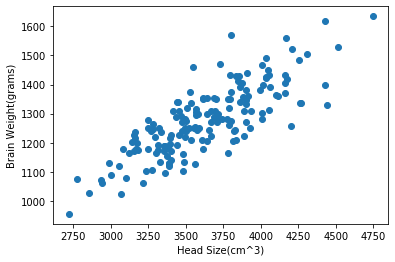

In [6]:
# plt.scatter(x,y)
plt.scatter(train_x, train_y)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()

### Exploring dataset

In [7]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


### Calculating m and c manually

In [18]:

# x = train_x
# y = train_y

mean_x = np.mean(x)
mean_y = np.mean(y)
num = 0
denom = 0

# for i in range(n):
#     num = num + (x[i] - mean_x)*(y[i] - mean_y)
#     denom = denom + ((x[i] - mean_x))**2
    
num = np.dot(np.subtract(x,mean_x), np.subtract(y,mean_y))
denom = np.dot(np.subtract(x,mean_x), np.subtract(x,mean_x))

m = num/denom
c = mean_y - (m*mean_x)
print(m,c)

0.2634293394893993 325.5734210494428


Text(0, 0.5, 'Brain weight in grams')

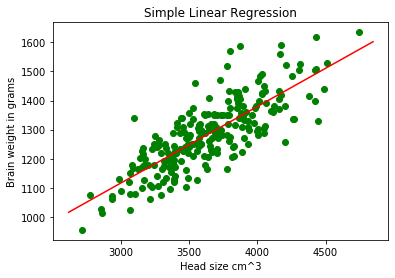

In [19]:
# creating dummy dataset

min_x = np.min(x)-100
max_x = np.max(x)+100
x = np.linspace(min_x,max_x,1000)
y = m*x+c

plt.scatter(X,Y,color='g')
plt.plot(x,y,color='r')
plt.title('Simple Linear Regression')
plt.xlabel('Head size cm^3')
plt.ylabel('Brain weight in grams')

### Calculating error - r^2

In [21]:
sum_pred = 0
sum_act = 0

for i in range(n):
#     y_pred = (m*X[i]+c)
#     sum_pred += (Y[i]-y_pred)**2
#     sum_act +=(Y[i]-mean_y)**2
    y_pred = (m*X[i]+c)
    sum_pred += (y_pred - mean_y)**2
    sum_act += (Y[i] - mean_y)**2

# r2 = 1-(sum_pred/sum_act)
r2 = sum_pred/sum_act
print(r2)

# Here we can observe that we got R**2> 0.5 . so we have good model

1.108200636789795


In [21]:
def predict(x):
    return m*x+c


In [22]:
print(predict(4177))

1425.9177720966636


### Implementing Gradient Descent

### Finding the optimal parameters using Gradient Descent

In [17]:
# x = data['Head Size(cm^3)']
# y = data['Brain Weight(grams)']
x = train_x
y = train_y
n = len(y)
X=x
Y=y
x.shape , y.shape, n

((165, 1), (165, 1), 165)

In [8]:
# Y = (Y - np.mean(Y))/np.std(Y)
# X = (X - np.mean(X))/np.std(X)

# train_xn = (train_x - np.mean(train_x))/np.std(train_x)
# train_yn = (train_y - np.mean(train_y))/np.std(train_y)

train_xn = train_x
train_yn = train_y

### Coverging Theta / Debugging Theta

In [9]:
def gradient_descent(x, y,m,c, alpha, iterations, n):

    # Performing Gradient Descent 
    for i in range(iterations): 
        y_guess = m*x + c  # The current predicted value of Y
        cost = 1/n * np.sum((y - y_guess)**2)
        D_m = (-2/n) * np.sum(x * (y- y_guess))  # Derivative wrt m
        D_c = (-2/n) * np.sum(y - y_guess)  # Derivative wrt c
        m = m - alpha * D_m  # Update m
        c = c - alpha * D_c  # Update c
        costs.append(cost)
#         print(i,m,c)
    return m,c, costs


In [10]:
# random_alpha = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
# random_iter = np.arange(1,1001, 1)
costs = []
m_history = []
c_history = []

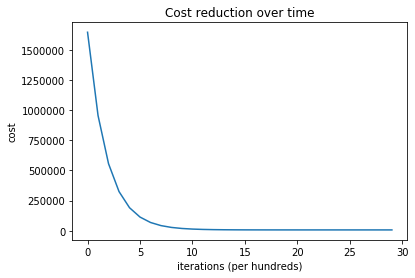

In [11]:
n = len(train_xn)
m = 0
c = 0

alpha = 0.000000009 # The learning Rate
iterations = 30 # The number of iterations to perform gradient descent

m,c, costs = gradient_descent(train_xn, train_yn, m, c, alpha, iterations, n)

m_history.append(m)
c_history.append(c)

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [12]:
m_history, c_history

([0.35128333822069163], [9.765287156421355e-05])

In [13]:
m_history, c_history

([0.35128333822069163], [9.765287156421355e-05])

### Computing the cost

In [44]:
# Building the model
n = len(train_xn)
m = 0
c = 0

alpha = 0.0003 # The learning Rate
iterations = 10000  # The number of iterations to perform gradient descent

m,c, costs = gradient_descent(train_xn, train_yn, m, c, alpha, iterations, n)

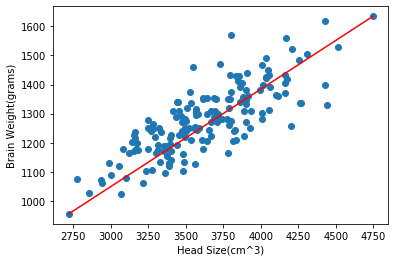

In [14]:
# test_xn = (test_x - np.mean(test_x))/np.std(test_x)
# test_yn = (test_y - np.mean(test_y))/np.std(test_y)

y_guess = m*train_x+c

plt.scatter(train_x,train_y)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.plot([min(train_x), max(train_x)], [min(train_y), max(train_y)], color='red')
plt.show()

In [15]:
sum_pred = 0
sum_act = 0
mse_num = 0
mean_x = np.mean(train_x)
mean_y = np.mean(train_y)
n = int(len(train_x)) # Number of elements in X

for xi,yi in zip(train_x, train_y):
    y_pred = (m*xi+c)
    sum_pred += (y_pred - mean_y)**2
    sum_act += (yi - mean_y)**2
    mse_num += np.abs(yi - y_pred)

r2 = 1-(sum_pred/sum_act)
mse = mse_num/n 
# r2 = sum_pred/sum_act
print(r2, mse)

-0.14966433350269792 62.415278084431414


In [16]:
m,c

(0.35128333822069163, 9.765287156421355e-05)

In [20]:
def predict(x):
    return m*x+c

egy1 = predict(4747)
egy1
# eg1 = (4747 - np.mean(train_x))/np.std(train_x)
# egy1 = predict(eg1)

# egy1*np.std(train_y) + np.mean(train_y)

1667.5421041864947

### Implementing Linear Regression - Lib

In [8]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values
n = len(y)

x = x.reshape((len(x),1))
y = y.reshape((len(y),1))

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3)
# train_x = x
# train_y = y
train_x.shape , train_y.shape

((165, 1), (165, 1))

In [9]:
from sklearn import linear_model

train_x2 = train_x[:, np.newaxis]
train_y2 = train_y[:, np.newaxis]

test_x2 = test_x[:, np.newaxis]
test_y2 = test_y[:, np.newaxis]

reg = linear_model.LinearRegression(normalize=True)
reg.fit(train_x, train_y) # accepts 2d array

y_predict = reg.predict(test_x)


In [10]:
from sklearn.metrics import r2_score

accuracy = r2_score(test_y, y_predict)
print(accuracy)

weights = reg.coef_
intercept = reg.intercept_
print(weights, intercept)

0.6096758996136917
[[0.26249305]] [322.71845901]


In [11]:
from sklearn.metrics import mean_absolute_error

accuracy2 = mean_absolute_error(test_y, y_predict)
accuracy2

56.47001202467527

In [39]:
reg.predict([[4747]])

array([[1568.77295768]])